In [1]:
# =============================
# COLAB QUANTUM SETUP
# =============================

!pip install qiskit --upgrade --force-reinstall # Force reinstall to fix potential import issues
!pip install qiskit_aer
!pip install pennylane
!pip install qiskit-algorithms
!pip install qiskit-ibm-runtime

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import pennylane as qml

print("✅ Environment ready")


  Using cached qiskit-2.2.3-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (12 kB)
  Using cached rustworkx-0.17.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.6.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
Using cached qiskit-2.2.3-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.0 MB)
Using cached dill-0.4.0-py3-none-any.whl (119 kB)
Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
Using cached rustworkx-0.17.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached scipy-1.16.3-cp312-cp312-manylinux201

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.0 MB/s eta 0:00:00
✅ Environment ready


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


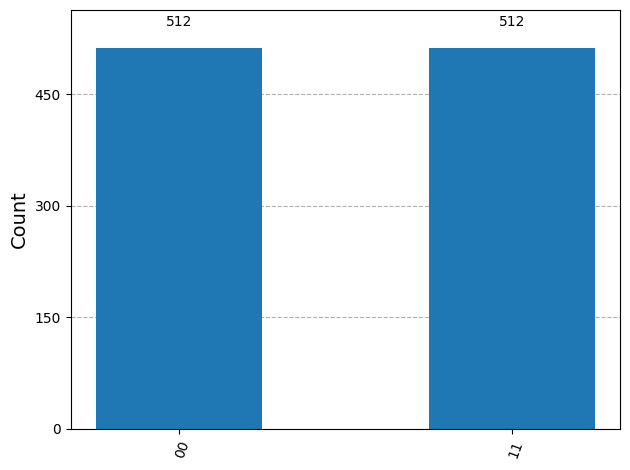

In [7]:
#day 37- Basic Bell State Circuit
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

print(qc.draw())

backend = Aer.get_backend("qasm_simulator")
job = backend.run(qc, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)


🔹 Z Basis: {'0': 530, '1': 494}
🔹 X Basis: {'0': 1024}


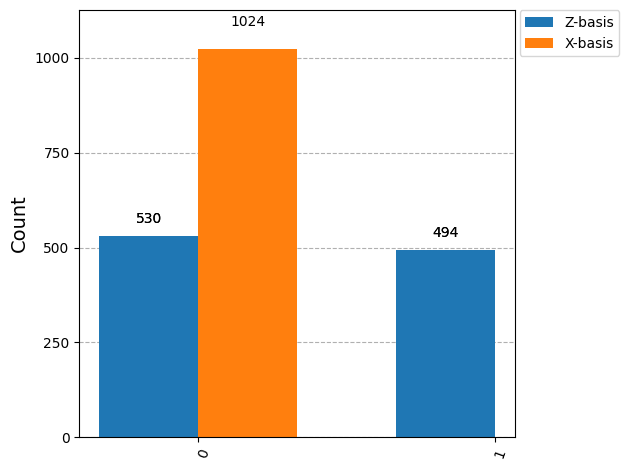

In [11]:
#day 38 Measuring in Different Bases
qc = QuantumCircuit(1)

qc.h(0)
qc.measure_all()

backend = Aer.get_backend("qasm_simulator")
result_z = backend.run(qc, shots=1024).result()
print("🔹 Z Basis:", result_z.get_counts())

qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.h(0)          # change basis
qc2.measure_all()

result_x = backend.run(qc2, shots=1024).result()
print("🔹 X Basis:", result_x.get_counts())

plot_histogram([result_z.get_counts(),
                result_x.get_counts()],
               legend=["Z-basis","X-basis"])

In [15]:
#day 39 deustch simplified
from qiskit import QuantumCircuit
from qiskit_aer import Aer

qc = QuantumCircuit(2,1)
qc.x(1)
qc.h([0,1])

qc.cx(0,1)    # balanced oracle

qc.h(0)
qc.measure(0,0)

print(qc.draw())

backend = Aer.get_backend("qasm_simulator")
res = backend.run(qc, shots=1024)
print("Result:", res.result().get_counts())


     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 
Result: {'1': 1024}


In [18]:
#Day 40- Bernstein–Vazirani Algorithm
secret = "101"

n = len(secret)
qc = QuantumCircuit(n+1, n)

qc.x(n)
qc.h(range(n+1))

for i,bit in enumerate(secret):
    if bit=="1":
        qc.cx(i,n)

qc.h(range(n))
qc.measure(range(n), range(n))

print(qc.draw())

result = Aer.get_backend("qasm_simulator").run(qc, shots=1024)
counts = result.result().get_counts()

print("✅ Discovered Secret:", max(counts,key=counts.get))


     ┌───┐          ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───
     ├───┤┌───┐  │  └┬─┬┘          └╥┘   
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║ ┌─┐
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐└───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├──────╫──╫─
     └───┘└───┘└───┘  ║  └───┘      ║  ║ 
c: 3/═════════════════╩═════════════╩══╩═
                      1             0  2 
✅ Discovered Secret: 101


In [20]:
#day 41 grover oracle only
from qiskit.circuit.library import PhaseOracle

oracle = PhaseOracle("(x0 & x1)")
print(oracle.draw())


        
q_0: ─■─
      │ 
q_1: ─■─
        


/tmp/ipython-input-2512404251.py:4: DeprecationWarning: The class ``qiskit.circuit.library.phase_oracle.PhaseOracle`` is deprecated as of Qiskit 2.2. It will be removed in Qiskit 3.0. Use the class qiskit.circuit.library.PhaseOracleGate instead.
  oracle = PhaseOracle("(x0 & x1)")


In [2]:
 import pennylane as qml



/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


Observables: (np.float64(0.0), np.float64(0.0))


(<Figure size 500x300 with 1 Axes>, <Axes: >)

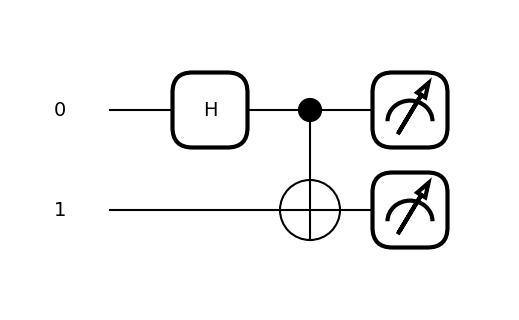

In [3]:
 #day 42 pennylane visual circuit
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def bell():
    qml.Hadamard(0)
    qml.CNOT([0,1])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

print("Observables:", bell())
qml.draw_mpl(bell)()

In [6]:
#day 42
# ========================================
# QUANTUM ENVIRONMENT SETUP — RUN ONCE
# ========================================

# The following pip installs are handled in the main setup cell (ZW0BgY20An1f)
# !pip install qiskit qiskit_aer pennylane

from qiskit import QuantumCircuit
from qiskit_aer import Aer # Corrected import for Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 'execute' function is deprecated, replaced by backend.run()

print("✅ Environment ready")


✅ Environment ready


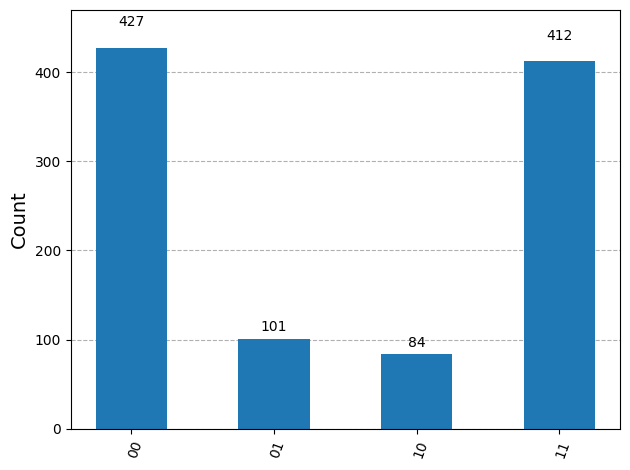

In [10]:
#day 43 Noise Model Simulation
# ========================================
# DAY 43 — NOISE MODEL SIMULATION
# ========================================

from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit import QuantumCircuit # Ensure QuantumCircuit is imported
from qiskit_aer import Aer # Ensure Aer is imported
from qiskit.visualization import plot_histogram # Ensure plot_histogram is imported

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Noise: Bit-flip 10% probability
noise = NoiseModel()
error_1q = pauli_error([("X", 0.1), ("I", 0.9)]) # 1-qubit error

# Apply 1-qubit error to 1-qubit gates like 'h'
noise.add_all_qubit_quantum_error(error_1q, ["h"])

# For 2-qubit gates like 'cx', we need a 2-qubit error.
# Create it by tensoring the 1-qubit error with itself.
error_2q = error_1q.tensor(error_1q)
noise.add_all_qubit_quantum_error(error_2q, ["cx"])

sim = Aer.get_backend("qasm_simulator")
job = sim.run(qc, noise_model=noise, shots=1024)

counts = job.result().get_counts()

plot_histogram(counts)


        ┌───┐                         ┌───┐ ░ ┌─┐      
   q_0: ┤ X ├──■────■─────────■────■──┤ X ├─░─┤M├──────
        └───┘┌─┴─┐  │  ┌───┐┌─┴─┐  │  └─┬─┘ ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼──┤ X ├┤ X ├──┼────■───░──╫─┤M├───
             └───┘┌─┴─┐└───┘└───┘┌─┴─┐  │   ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├──────────┤ X ├──■───░──╫──╫─┤M├
                  └───┘          └───┘      ░  ║  ║ └╥┘
meas: 3/═══════════════════════════════════════╩══╩══╩═
                                               0  1  2 


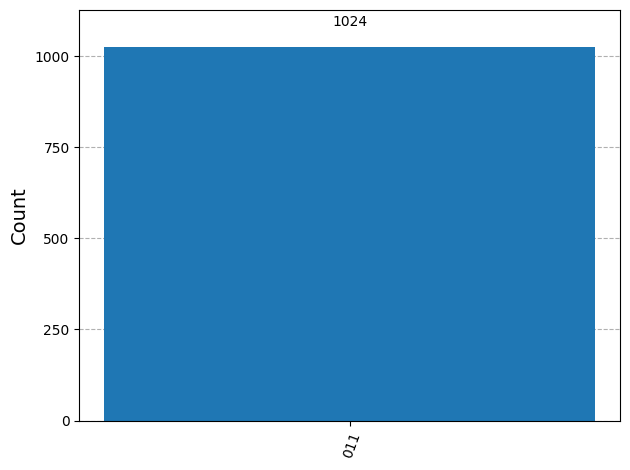

In [12]:
#day 44 3-Qubit Error Correction (Bit-Flip Code)
# ========================================
# DAY 44 — ERROR CORRECTION (3-Qubit Code)
# ========================================

qc = QuantumCircuit(3)

# Encode logical |1>
qc.x(0)
qc.cx(0,1)
qc.cx(0,2)

# Artificial bit flip error
qc.x(1)

# Decode
qc.cx(0,1)
qc.cx(0,2)
qc.ccx(1,2,0)

qc.measure_all()

sim = Aer.get_backend("qasm_simulator")
job = sim.run(qc, shots=1024)

counts = job.result().get_counts()

print(qc.draw())
plot_histogram(counts)


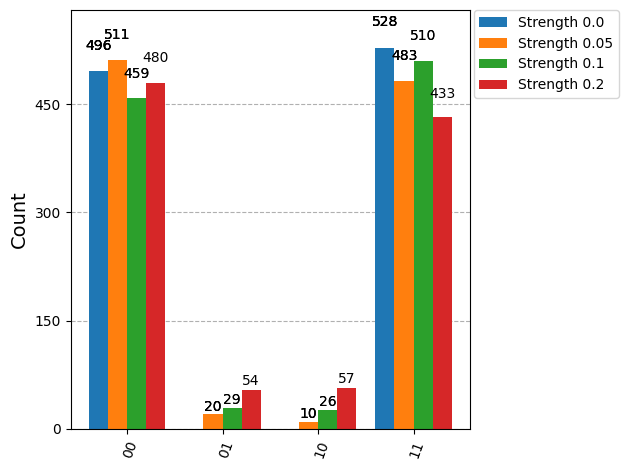

In [15]:
#day 44 ZNE (Zero Noise Extrapolation
# ========================================
# DAY 43 — ZNE SIMULATION
# ========================================

from qiskit_aer.noise import depolarizing_error, NoiseModel

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

strengths = [0.00, 0.05, 0.1, 0.2]
results = {}

sim = Aer.get_backend("qasm_simulator")

for s in strengths:

    noise = NoiseModel()
    noise.add_all_qubit_quantum_error(
        depolarizing_error(s,1), ["h"]
    )
    noise.add_all_qubit_quantum_error(
        depolarizing_error(s,2), ["cx"]
    )

    job = sim.run(qc, noise_model=noise, shots=1024)
    results[s] = job.result().get_counts()

# Corrected call to plot_histogram for multiple results with labels
plot_histogram(list(results.values()), legend=[f"Strength {s}" for s in results.keys()])


In [2]:
#day 46
# ========================================
# DAY 46 — VQE H2 MOLECULE
# ========================================

import pennylane as qml
from pennylane import numpy as np

# Hydrogen Hamiltonian (H2 minimal basis pre-coded)
coeffs = [ -0.2427, -0.2427,  0.1712,
           0.1209,  0.1209,  0.1686 ]
ops = [
    qml.PauliZ(0),
    qml.PauliZ(1),
    qml.PauliZ(0) @ qml.PauliZ(1),
    qml.PauliX(0) @ qml.PauliX(1),
    qml.PauliY(0) @ qml.PauliY(1),
    qml.Identity(0)
]

H = qml.Hamiltonian(coeffs, ops)

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def vqe_circuit(weights):
    qml.RY(weights[0], 0)
    qml.RY(weights[1], 1)
    qml.CNOT([0,1])
    return qml.expval(H)

weights = np.array([0.0, 0.0], requires_grad=True)

opt = qml.AdamOptimizer(stepsize=0.1)

for i in range(100):
    weights, energy = opt.step_and_cost(vqe_circuit, weights)

    if i % 10 == 0:
        print(f"Step {i}: Energy = {energy:.6f}")

print("\n✅ Final Energy:", energy)


Step 0: Energy = -0.145600
Step 10: Energy = -0.145600
Step 20: Energy = -0.145600
Step 30: Energy = -0.145600
Step 40: Energy = -0.145600
Step 50: Energy = -0.145600
Step 60: Energy = -0.145600
Step 70: Energy = -0.145600
Step 80: Energy = -0.145600
Step 90: Energy = -0.145600

✅ Final Energy: -0.14560000000000003


In [6]:
#day 46
# =========================
# SETUP - run once in Colab
# =========================
!pip install -q qiskit qiskit_aer pennylane matplotlib seaborn ipywidgets
# enable widgets (may prompt to reload)
import qiskit
import pennylane as qml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel, depolarizing_error, pauli_error
from qiskit.quantum_info import state_fidelity, Statevector, partial_trace
from qiskit.visualization import plot_histogram
from IPython.display import HTML, display, clear_output
print("Qiskit:", qiskit.__version__, "PennyLane:", qml.__version__)
sns.set()


Qiskit: 2.2.3 PennyLane: 0.43.1


Running: adam
Running: gradientdescent
Running: cobyla


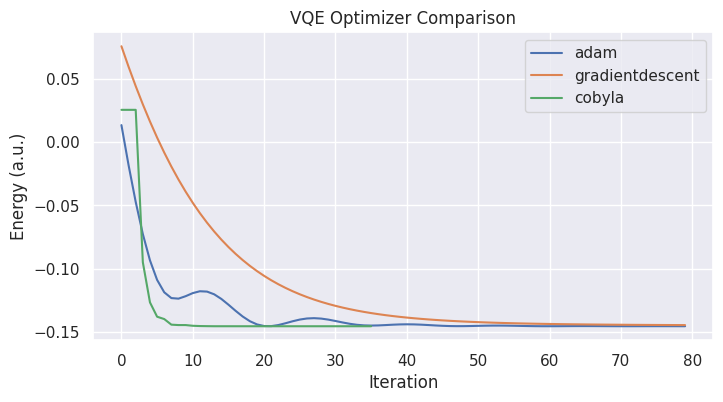

In [10]:
#day 47 VQE optimizer tuning
# =========================
# DAY 47 - VQE OPTIMIZER TUNING (FIXED VERSION)
# =========================

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# -------------------------
# Hamiltonian (toy H2-like)
# -------------------------
coeffs = [ -0.2427, -0.2427,  0.1712, 0.1209,  0.1209,  0.1686 ]
ops = [
    qml.PauliZ(0),
    qml.PauliZ(1),
    qml.PauliZ(0) @ qml.PauliZ(1),
    qml.PauliX(0) @ qml.PauliX(1),
    qml.PauliY(0) @ qml.PauliY(1),
    qml.Identity(0)
]
H = qml.Hamiltonian(coeffs, ops)

# -------------------------
# Quantum Device
# -------------------------
dev = qml.device("default.qubit", wires=2, shots=None)

# -------------------------
# VQE runner function
# -------------------------
def vqe_run(optimizer_name, steps=80, lr=0.1):

    @qml.qnode(dev, interface="autograd")
    def circuit(weights):
        qml.RY(weights[0], wires=0)
        qml.RY(weights[1], wires=1)
        qml.CNOT(wires=[0,1])
        return qml.expval(H)

    # Initial weights
    weights = np.random.randn(2, requires_grad=True)
    energies = []

    # -------------------------
    # ADAM OPTIMIZER
    # -------------------------
    if optimizer_name.lower() == "adam":

        opt = qml.AdamOptimizer(stepsize=lr)

        for i in range(steps):
            weights, energy = opt.step_and_cost(circuit, weights)
            energies.append(float(energy))


    # -------------------------
    # GRADIENT DESCENT
    # -------------------------
    elif optimizer_name.lower() == "gradientdescent":

        opt = qml.GradientDescentOptimizer(stepsize=lr)

        for i in range(steps):
            weights, energy = opt.step_and_cost(circuit, weights)
            energies.append(float(energy))


    # -------------------------
    # COBYLA (SCI PY)
    # -------------------------
    elif optimizer_name.lower() == "cobyla":

        def cost_fn(w):
            return circuit(w)

        callback_energies = []

        def callback(xk):
            e = cost_fn(np.array(xk))
            callback_energies.append(float(e))

        res = minimize(
            fun=cost_fn,
            x0=weights,
            method="COBYLA",
            callback=callback,
            options={"maxiter": steps}
        )

        energies = callback_energies


    else:
        raise ValueError("Unknown optimizer")

    return energies


# -------------------------
# Run experiments
# -------------------------
optimizers = ["adam", "gradientdescent", "cobyla"]

results = {}
for opt in optimizers:
    print("Running:", opt)
    results[opt] = vqe_run(opt, steps=80, lr=0.1)

# -------------------------
# Plot convergence
# -------------------------
plt.figure(figsize=(8,4))

for k, v in results.items():
    plt.plot(v, label=k)

plt.xlabel("Iteration")
plt.ylabel("Energy (a.u.)")
plt.title("VQE Optimizer Comparison")
plt.legend()
plt.grid(True)
plt.show()


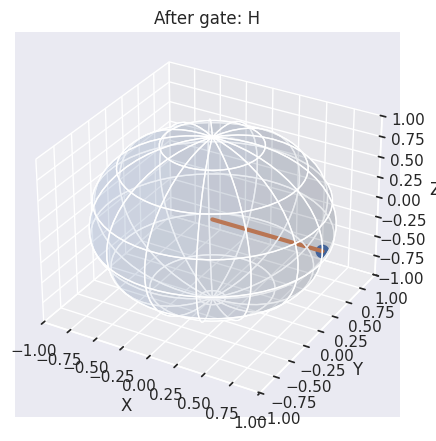

In [11]:
#day 48 Bloch Sphere Animations
# =========================
# DAY 48- BLOCH SPHERE ANIMATION
# =========================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qiskit.quantum_info import Statevector
from matplotlib import animation
from IPython.display import HTML

# Helper: compute Bloch vector from statevector
def bloch_vector_from_state(psi):
    sv = Statevector(psi)
    # expectation values of Pauli X,Y,Z:
    sx = np.real((sv.expectation_value(qiskit.quantum_info.Pauli("X"))))
    sy = np.real((sv.expectation_value(qiskit.quantum_info.Pauli("Y"))))
    sz = np.real((sv.expectation_value(qiskit.quantum_info.Pauli("Z"))))
    return np.array([sx, sy, sz], dtype=float)

# Build single-qubit circuits sequence
gates_sequence = [
    ("H", lambda qc: qc.h(0)),
    ("RX(pi/4)", lambda qc: qc.rx(np.pi/4, 0)),
    ("RY(pi/3)", lambda qc: qc.ry(np.pi/3, 0)),
    ("RZ(pi/2)", lambda qc: qc.rz(np.pi/2, 0)),
    ("X", lambda qc: qc.x(0)),
]

states = []
qc_base = QuantumCircuit(1)
for name, gatefn in gates_sequence:
    gatefn(qc_base)
    # get statevector by simulating the partial circuit
    sv = Statevector.from_instruction(qc_base)
    states.append((name, sv.data))

# Prepare Bloch vectors
bloch_traj = np.array([bloch_vector_from_state(sv) for (_, sv) in states])

# Animate
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
# draw sphere
u = np.linspace(0, 2 * np.pi, 60)
v = np.linspace(0, np.pi, 30)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones_like(u), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, alpha=0.1)

vec, = ax.plot([0, bloch_traj[0,0]], [0, bloch_traj[0,1]], [0, bloch_traj[0,2]], lw=3)
point = ax.scatter(bloch_traj[0,0], bloch_traj[0,1], bloch_traj[0,2], s=80)

ax.set_xlim([-1,1]); ax.set_ylim([-1,1]); ax.set_zlim([-1,1])
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title("Bloch Sphere Evolution")

def update(i):
    v = bloch_traj[i]
    vec.set_data([0, v[0]], [0, v[1]])
    vec.set_3d_properties([0, v[2]])
    point._offsets3d = ([v[0]],[v[1]],[v[2]])
    ax.set_title(f"After gate: {states[i][0]}")
    return vec, point

ani = animation.FuncAnimation(fig, update, frames=len(bloch_traj), interval=1000, blit=False)
HTML(ani.to_jshtml())


In [13]:
#day 49 Circuit Resource Metrics
# =========================
# DAY 49 - CIRCUIT RESOURCE METRICS
# =========================

from qiskit import transpile
from qiskit.circuit import QuantumCircuit

# Example circuits: Bell, GHZ, Grover(2)
bell = QuantumCircuit(2)
bell.h(0); bell.cx(0,1)

ghz = QuantumCircuit(3)
ghz.h(0); ghz.cx(0,1); ghz.cx(1,2)

# Simple 2-qubit Grover oracle for |11>
grover = QuantumCircuit(2)
grover.h([0,1])
grover.cz(0,1)
grover.h([0,1])

circuits = {"Bell": bell, "GHZ": ghz, "Grover": grover}
backend = Aer.get_backend("aer_simulator")
basis_gates = ["u3","cx"]  # basis for transpiler (older Qiskit) or use "u","cx" on new versions

for name, qc in circuits.items():
    print("----", name, "----")
    print("num_qubits:", qc.num_qubits)
    print("depth:", qc.depth())
    print("size:", qc.size())
    print("count_ops:", qc.count_ops())
    # transpile to backend to get real-device view
    tqc = transpile(qc, backend=backend, optimization_level=3)
    print("transpiled depth:", tqc.depth())
    print("transpiled count_ops:", tqc.count_ops())
    print()


---- Bell ----
num_qubits: 2
depth: 2
size: 2
count_ops: OrderedDict({'h': 1, 'cx': 1})
transpiled depth: 2
transpiled count_ops: OrderedDict({'h': 1, 'cx': 1})

---- GHZ ----
num_qubits: 3
depth: 3
size: 3
count_ops: OrderedDict({'cx': 2, 'h': 1})
transpiled depth: 3
transpiled count_ops: OrderedDict({'cx': 2, 'h': 1})

---- Grover ----
num_qubits: 2
depth: 3
size: 5
count_ops: OrderedDict({'h': 4, 'cz': 1})
transpiled depth: 3
transpiled count_ops: OrderedDict({'h': 4, 'cz': 1})



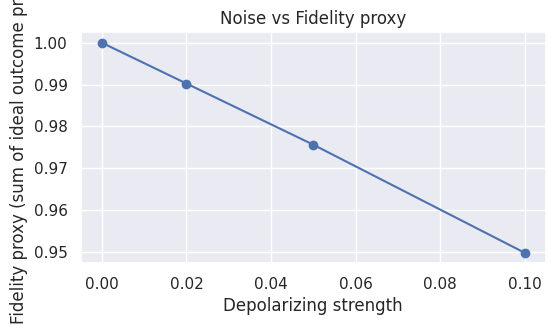

Noise strength: 0.0


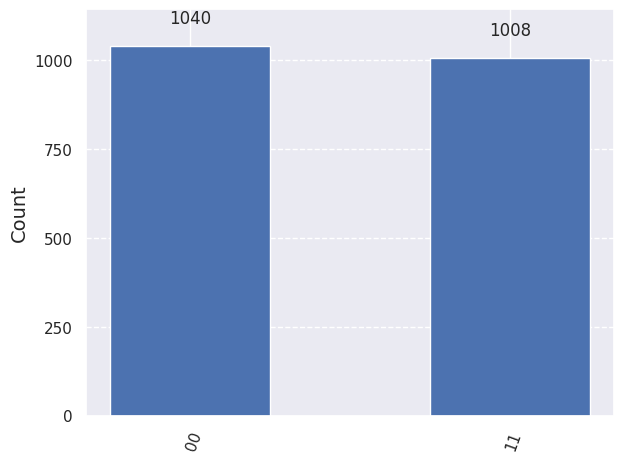

Noise strength: 0.02


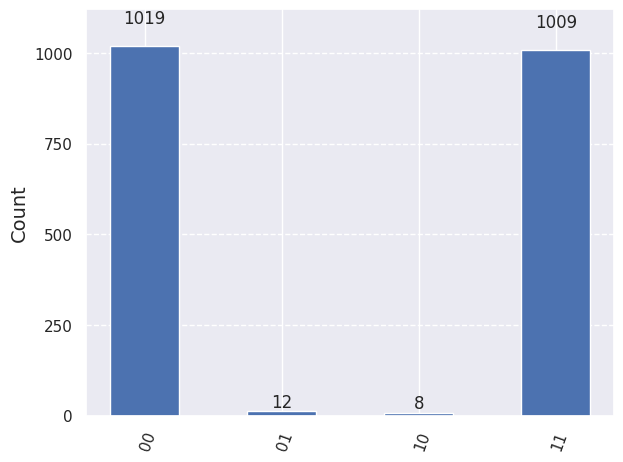

Noise strength: 0.05


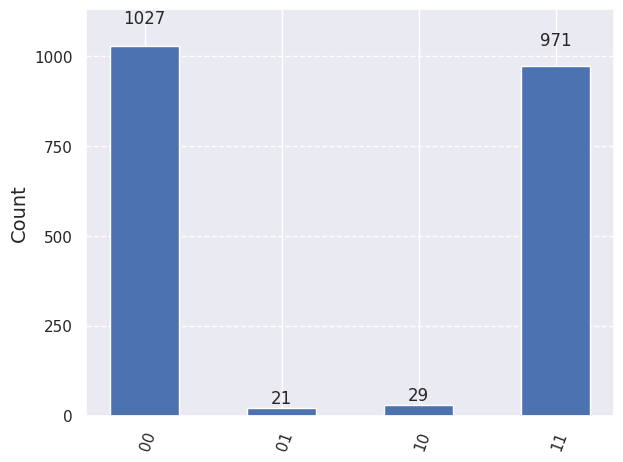

Noise strength: 0.1


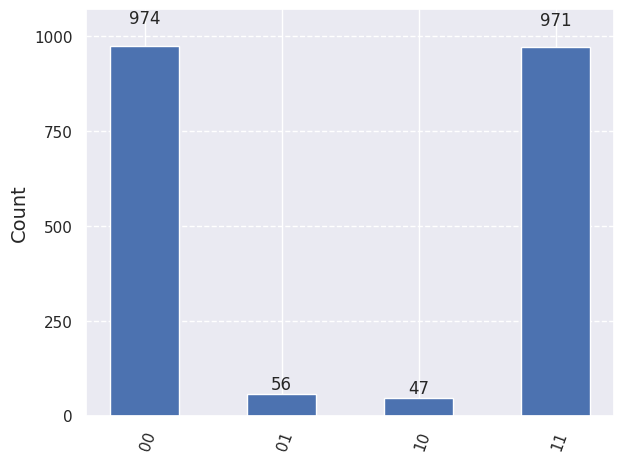

In [15]:
#day 50 Noise Analysis Visual Dashboards
# =========================
# DAY 50 - NOISE ANALYSIS DASHBOARD
# =========================

from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

def analyze_noise_on_circuit(qc, strengths=[0.0, 0.02, 0.05, 0.1], shots=2048):
    sim = Aer.get_backend("qasm_simulator")

    # Create a copy of the circuit without measurements for ideal statevector calculation
    qc_no_measure = qc.remove_final_measurements(inplace=False)
    ideal_sv = Statevector.from_instruction(qc_no_measure)

    fidelities = []
    histograms = {}
    for s in strengths:
        noise = NoiseModel()
        # apply depolarizing on single and 2-qubit gates
        noise.add_all_qubit_quantum_error(depolarizing_error(s,1), ["h", "x", "rx","ry","rz"])
        noise.add_all_qubit_quantum_error(depolarizing_error(s,2), ["cx","cz"])

        # Use sim.run() instead of the deprecated execute function
        job = sim.run(qc, noise_model=noise, shots=shots)
        counts = job.result().get_counts()

        # get noisy statevector approx via statevector simulator with same noise model is nontrivial;
        # we approximate fidelity by calculating overlap with ideal using sampled distribution (not exact)
        # Instead, build noisy density via multiple runs of statevector + noise is expensive; here we compute expected fidelity proxy:
        # compute probability mass on ideal outcomes (for computational-basis circuits)
        # The ideal outcomes for a Bell state should be '00' and '11'
        ideal_outcomes = ideal_sv.probabilities_dict()
        # sum of probabilities for the most likely outcomes
        fidelity_proxy = sum(counts.get(bitstring, 0) for bitstring in ideal_outcomes.keys()) / shots
        fidelities.append(fidelity_proxy)
        histograms[s] = counts

    # Plot fidelities
    plt.figure(figsize=(6,3))
    plt.plot(strengths, fidelities, marker='o')
    plt.xlabel("Depolarizing strength")
    plt.ylabel("Fidelity proxy (sum of ideal outcome prob)") # Changed label for clarity
    plt.title("Noise vs Fidelity proxy")
    plt.grid(True)
    plt.show()

    # show histograms for each noise level
    for s,cnts in histograms.items():
        print(f"Noise strength: {s}")
        display(plot_histogram(cnts))
        plt.show()

# Example: use Bell circuit
qc_bell = QuantumCircuit(2)
qc_bell.h(0); qc_bell.cx(0,1); qc_bell.measure_all()
analyze_noise_on_circuit(qc_bell, strengths=[0.0, 0.02, 0.05, 0.1])

Analyzing: Bell
[Bell] noise=0.000 fidelity=1.0000 depth=2 ops=OrderedDict({'h': 1, 'cx': 1})
[Bell] noise=0.005 fidelity=0.9938 depth=2 ops=OrderedDict({'h': 1, 'cx': 1})
[Bell] noise=0.010 fidelity=0.9876 depth=2 ops=OrderedDict({'h': 1, 'cx': 1})
[Bell] noise=0.020 fidelity=0.9752 depth=2 ops=OrderedDict({'h': 1, 'cx': 1})
[Bell] noise=0.050 fidelity=0.9388 depth=2 ops=OrderedDict({'h': 1, 'cx': 1})
Analyzing: GHZ3
[GHZ3] noise=0.000 fidelity=1.0000 depth=3 ops=OrderedDict({'cx': 2, 'h': 1})
[GHZ3] noise=0.005 fidelity=0.9894 depth=3 ops=OrderedDict({'cx': 2, 'h': 1})
[GHZ3] noise=0.010 fidelity=0.9789 depth=3 ops=OrderedDict({'cx': 2, 'h': 1})
[GHZ3] noise=0.020 fidelity=0.9582 depth=3 ops=OrderedDict({'cx': 2, 'h': 1})
[GHZ3] noise=0.050 fidelity=0.8981 depth=3 ops=OrderedDict({'cx': 2, 'h': 1})
Analyzing: Grover2
[Grover2] noise=0.000 fidelity=1.0000 depth=3 ops=OrderedDict({'h': 4, 'cz': 1})
[Grover2] noise=0.005 fidelity=0.9839 depth=3 ops=OrderedDict({'h': 4, 'cz': 1})
[Grover

,circuit,noise,fidelity,depth,ops
0,Bell,0.000,1.000000,2,"{'h': 1, 'cx': 1}"
1,Bell,0.005,0.993763,2,"{'h': 1, 'cx': 1}"
2,Bell,0.010,0.987550,2,"{'h': 1, 'cx': 1}"
3,Bell,0.020,0.975200,2,"{'h': 1, 'cx': 1}"
4,Bell,0.050,0.938750,2,"{'h': 1, 'cx': 1}"
0,GHZ3,0.000,1.000000,3,"{'cx': 2, 'h': 1}"
1,GHZ3,0.005,0.989419,3,"{'cx': 2, 'h': 1}"
2,GHZ3,0.010,0.978925,3,"{'cx': 2, 'h': 1}"
3,GHZ3,0.020,0.958196,3,"{'cx': 2, 'h': 1}"
4,GHZ3,0.050,0.898063,3,"{'cx': 2, 'h': 1}"


Saved noise_impact_report.csv


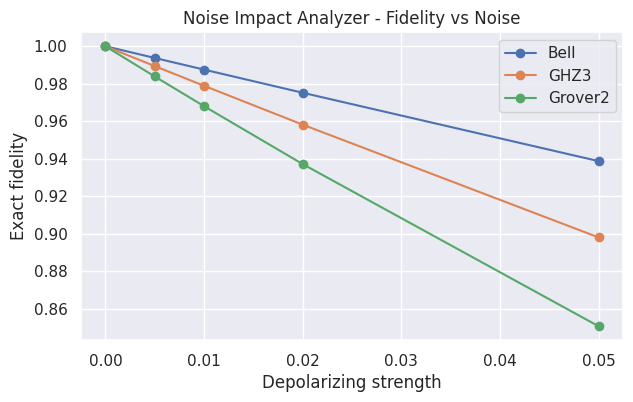

In [17]:
# day 50 Mini-Project: Noise Impact Analyzer Tool
# =========================
# DAY 50 - NOISE IMPACT ANALYZER TOOL
# =========================

import pandas as pd
from qiskit_aer import AerSimulator
from qiskit.quantum_info import DensityMatrix, state_fidelity, Statevector
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt

# Define circuits (without measurement for state analyses)
def make_bell():
    qc = QuantumCircuit(2)
    qc.h(0); qc.cx(0,1)
    return qc

def make_ghz(n=3):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

def make_grover_two():
    qc = QuantumCircuit(2)
    qc.h([0,1])
    qc.cz(0,1)
    qc.h([0,1])
    return qc

circuits = {"Bell": make_bell(), "GHZ3": make_ghz(3), "Grover2": make_grover_two()}

def exact_density_fidelity(qc, noise_model):
    # Use AerSimulator's density_matrix method to run noisy circuit and get density matrix
    sim = AerSimulator(method="density_matrix")

    # Transpile and add save instruction
    tqc = transpile(qc, sim)  # transpile for simulator
    tqc.save_density_matrix() # Explicitly save the density matrix

    job = sim.run(tqc, noise_model=noise_model)
    result = job.result()

    # Retrieve the saved density matrix
    rho = result.data(0).get("density_matrix")

    # Add a check for None to provide a more specific error if it still fails
    if rho is None:
        raise RuntimeError("AerSimulator failed to return a density matrix. Check simulation configuration or circuit size.")

    # ideal pure state:
    ideal_sv = Statevector.from_instruction(qc)
    ideal_dm = DensityMatrix(ideal_sv)
    noisy_dm = DensityMatrix(rho)
    fid = state_fidelity(ideal_dm, noisy_dm)
    return fid, noisy_dm

def analyze_circuit_noise(name, qc, strengths=[0.0,0.01,0.02,0.05]):
    rows = []
    for s in strengths:
        noise = NoiseModel()
        noise.add_all_qubit_quantum_error(depolarizing_error(s,1), ["u","h","x","rx","ry","rz"])
        noise.add_all_qubit_quantum_error(depolarizing_error(s,2), ["cx","cz"])
        fid, noisy_dm = exact_density_fidelity(qc, noise)
        depth = qc.depth()
        ops = qc.count_ops()
        rows.append({"circuit": name, "noise": s, "fidelity": fid, "depth": depth, "ops": ops})
        print(f"[{name}] noise={s:.3f} fidelity={fid:.4f} depth={depth} ops={ops}")
    df = pd.DataFrame(rows)
    return df

# Run analysis for all circuits and strengths
strengths = [0.0, 0.005, 0.01, 0.02, 0.05]
full_report = pd.DataFrame()
for name, qc in circuits.items():
    print("Analyzing:", name)
    report = analyze_circuit_noise(name, qc, strengths=strengths)
    full_report = pd.concat([full_report, report], axis=0)

display(full_report)
full_report.to_csv("noise_impact_report.csv", index=False)
print("Saved noise_impact_report.csv")

# Visual summary
plt.figure(figsize=(7,4))
for name in full_report['circuit'].unique():
    sub = full_report[full_report['circuit']==name]
    plt.plot(sub['noise'], sub['fidelity'], marker='o', label=name)
plt.xlabel("Depolarizing strength")
plt.ylabel("Exact fidelity")
plt.title("Noise Impact Analyzer - Fidelity vs Noise")
plt.legend(); plt.grid(True)
plt.show()


In [18]:
#day 52 VQE with RY-RZ Ansatz
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)

H = qml.Hamiltonian(
    [0.5, -1.0, 0.5],
    [qml.PauliZ(0), qml.PauliZ(1), qml.PauliX(0) @ qml.PauliX(1)]
)

@qml.qnode(dev)
def ansatz(weights):
    qml.RY(weights[0], wires=0)
    qml.RZ(weights[1], wires=0)
    qml.RY(weights[2], wires=1)
    qml.RZ(weights[3], wires=1)
    qml.CNOT(wires=[0,1])
    return qml.expval(H)

weights = np.random.rand(4, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.1)

for i in range(50):
    weights, energy = opt.step_and_cost(ansatz, weights)
    if i % 10 == 0:
        print(f"Step {i}: Energy = {energy:.6f}")

print("✅ Final VQE Energy:", energy)


Step 0: Energy = -0.252857
Step 10: Energy = -0.470723
Step 20: Energy = -0.503015
Step 30: Energy = -0.528611
Step 40: Energy = -0.672263
✅ Final VQE Energy: -0.6844958098876486


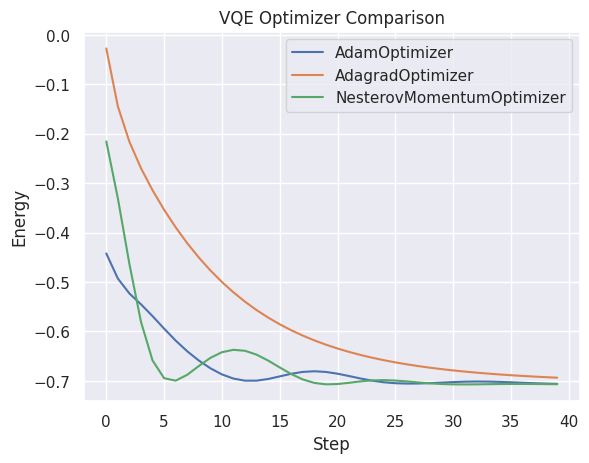

In [19]:
#day 53 VQE with Different Optimizers Comparison
optimizers = [qml.AdamOptimizer, qml.AdagradOptimizer, qml.NesterovMomentumOptimizer]
results = {}

for opt_cls in optimizers:
    weights = np.random.rand(4, requires_grad=True)
    opt = opt_cls(stepsize=0.1)
    energies = []
    for i in range(40):
        weights, energy = opt.step_and_cost(ansatz, weights)
        energies.append(energy)
    results[opt_cls.__name__] = energies

import matplotlib.pyplot as plt
for k,v in results.items():
    plt.plot(v, label=k)
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("VQE Optimizer Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
#day 54 Quantum Fourier Transform (QFT)
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(3)
# Apply QFT
qc.h(0)
qc.cp(np.pi/2,1,0)
qc.h(1)
qc.cp(np.pi/4,2,0)
qc.cp(np.pi/2,2,1)
qc.h(2)

print(qc.draw())


     ┌───┐                                     
q_0: ┤ H ├─■─────────────■─────────────────────
     └───┘ │P(π/2) ┌───┐ │                     
q_1: ──────■───────┤ H ├─┼────────■────────────
                   └───┘ │P(π/4)  │P(π/2) ┌───┐
q_2: ────────────────────■────────■───────┤ H ├
                                          └───┘


In [22]:
#day 55 QFT inverse
qc_inv = qc.inverse()
print(qc_inv.draw())


                                             ┌───┐
q_0: ────────────────■──────────────■────────┤ H ├
                     │        ┌───┐ │P(-π/2) └───┘
q_1: ──────■─────────┼────────┤ H ├─■─────────────
     ┌───┐ │P(-π/2)  │P(-π/4) └───┘               
q_2: ┤ H ├─■─────────■────────────────────────────
     └───┘                                        


In [31]:
#DAY 56 — Simple Quantum Classifier
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(weights, x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    return qml.expval(qml.PauliZ(0))

X = np.array([[0.1,0.2],[0.3,0.4]])
Y = np.array([1,-1])
weights = np.random.rand(2, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.1)

for i in range(30):
    for x,y in zip(X,Y):
        weights, cost = opt.step_and_cost(lambda w: (circuit(w,x)-y)**2, weights)

print("Trained weights:", weights)


Trained weights: [1.55794861 0.35542827]


In [35]:
#DAY 57 — Quantum Kernel SVM
from sklearn.svm import SVC
import pennylane as qml # Corrected import

def kernel(x1,x2):
    dev = qml.device("default.qubit", wires=2)
    @qml.qnode(dev)
    def overlap_circuit(x1,x2):
        qml.RX(x1[0],wires=0)
        qml.RY(x1[1],wires=1)
        qml.CNOT(wires=[0,1])
        qml.RX(x2[0],wires=0)
        qml.RY(x2[1],wires=1)
        return qml.probs(wires=[0])
    return np.abs(overlap_circuit(x1,x2)[0])**2

# Example: train small SVM
X_train = np.array([[0.1,0.2],[0.3,0.4]])
Y_train = np.array([1,-1])
clf = SVC(kernel=lambda X,Y: np.array([[kernel(xi,xj) for xj in Y] for xi in X]))
clf.fit(X_train, Y_train)
print(clf.predict(X_train))


[-1  1]


In [36]:
#DAY 58 — Hybrid Quantum-Classical Regression
import pennylane as qml

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(weights, x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    return qml.expval(qml.PauliZ(0))

X = np.array([[0.1,0.2],[0.2,0.3]])
Y = np.array([0.5,0.6])
weights = np.random.rand(2, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.1)

for i in range(40):
    for x,y in zip(X,Y):
        weights, cost = opt.step_and_cost(lambda w: (circuit(w,x)-y)**2, weights)
    if i%10==0: print(f"Step {i}: cost={cost:.6f}")

print("Trained weights:", weights)


Step 0: cost=0.129182
Step 10: cost=0.000292
Step 20: cost=0.007104
Step 30: cost=0.004996
Trained weights: [0.98608564 0.20284698]


In [37]:
#day 59  Hybrid Quantum-Classical Regression
import pennylane as qml

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(weights, x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    return qml.expval(qml.PauliZ(0))

X = np.array([[0.1,0.2],[0.2,0.3]])
Y = np.array([0.5,0.6])
weights = np.random.rand(2, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.1)

for i in range(40):
    for x,y in zip(X,Y):
        weights, cost = opt.step_and_cost(lambda w: (circuit(w,x)-y)**2, weights)
    if i%10==0: print(f"Step {i}: cost={cost:.6f}")

print("Trained weights:", weights)


Step 0: cost=0.060599
Step 10: cost=0.000728
Step 20: cost=0.001294
Step 30: cost=0.002542
Trained weights: [0.97661747 0.11287178]


In [38]:
#day 60 Quantum Data Encoding Techniques
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit_angle(x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    return qml.expval(qml.PauliZ(0))

@qml.qnode(dev)
def circuit_amplitude(x):
    qml.AmplitudeEmbedding(x, wires=[0,1], normalize=True)
    return qml.expval(qml.PauliZ(0))


ANGLE ENCODING CIRCUIT:
0: ──RX(0.79)─┤  <Z>
1: ──RY(1.05)─┤     

AMPLITUDE ENCODING CIRCUIT:
0: ─╭|Ψ⟩─┤  <Z>
1: ─╰|Ψ⟩─┤     

Bloch sphere – Angle Encoding

Bloch sphere – Amplitude Encoding


/usr/local/lib/python3.12/dist-packages/pennylane/ops/qubit/state_preparation.py:523: RuntimeWarning: invalid value encountered in divide
  state = state / math.reshape(norm, (*shape[:-1], 1))


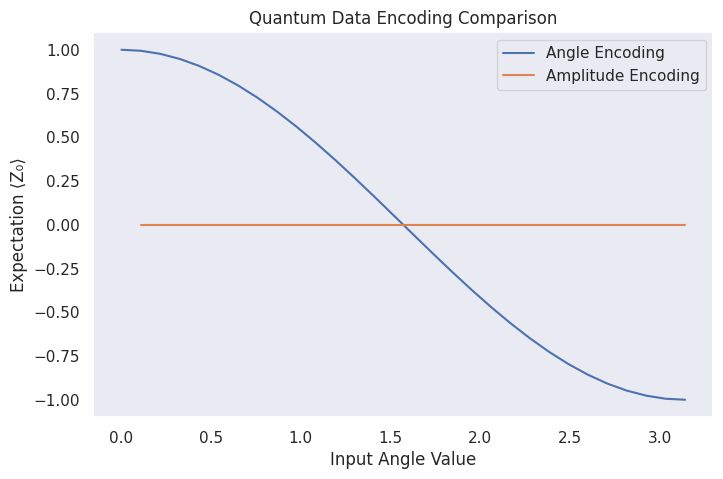

In [42]:
# -------------------------------
# Day 61: Quantum Data Encoding + Visualizations
# -------------------------------

import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
# Import Qiskit visualization for Bloch sphere
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

# 2-qubit quantum device
dev = qml.device("default.qubit", wires=2)

# -------------------------------
# ANGLE ENCODING CIRCUIT
# -------------------------------
@qml.qnode(dev)
def circuit_angle(x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    return qml.expval(qml.PauliZ(0))

# -------------------------------
# AMPLITUDE ENCODING CIRCUIT
# -------------------------------
@qml.qnode(dev)
def circuit_amplitude(x):
    qml.AmplitudeEmbedding(x, wires=[0, 1], normalize=True)
    return qml.expval(qml.PauliZ(0))

# -------------------------------
# DRAW CIRCUITS
# -------------------------------
x_angle = np.array([np.pi/4, np.pi/3])
x_amp   = np.array([0.2, 0.4, 0.6, 0.1])

print("ANGLE ENCODING CIRCUIT:")
print(qml.drawer.draw(circuit_angle)(x_angle))

print("\nAMPLITUDE ENCODING CIRCUIT:")
print(qml.drawer.draw(circuit_amplitude)(x_amp))

# -------------------------------
# BLOCH SPHERE VISUALIZATION
# -------------------------------
@qml.qnode(dev)
def angle_state(x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    return qml.state()

@qml.qnode(dev)
def amplitude_state(x):
    qml.AmplitudeEmbedding(x, wires=[0, 1], normalize=True)
    return qml.state()

# Plot Bloch sphere for wire 0
qml.drawer.use_style("black_white") # This is for PennyLane circuit drawing styles, not Qiskit's Bloch plots

print("\nBloch sphere – Angle Encoding")
# Convert PennyLane state to Qiskit Statevector for plotting
plot_bloch_multivector(Statevector(angle_state(x_angle)))

print("\nBloch sphere – Amplitude Encoding")
# Convert PennyLane state to Qiskit Statevector for plotting
plot_bloch_multivector(Statevector(amplitude_state(x_amp)))

# -------------------------------
# EXPECTATION VALUE SWEEP PLOT
# -------------------------------
angles = np.linspace(0, np.pi, 30)

angle_outputs = []
amp_outputs = []

for t in angles:
    angle_outputs.append(circuit_angle([t, t]))
    amp_outputs.append(circuit_amplitude([t, t, t, t]))

# Plot comparison
plt.figure(figsize=(8,5))
plt.plot(angles, angle_outputs, label="Angle Encoding")
plt.plot(angles, amp_outputs, label="Amplitude Encoding")
plt.xlabel("Input Angle Value")
plt.ylabel("Expectation ⟨Z₀⟩")
plt.title("Quantum Data Encoding Comparison")
plt.legend()
plt.grid()

plt.show()

In [44]:
#day 62 Simple Quantum Neural Network
dev = qml.device("default.qubit", wires=2)

def layer(weights):
    qml.RY(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.CNOT([0,1])

@qml.qnode(dev)
def qnn(weights, x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    for w in weights:
        layer(w)
    return qml.expval(qml.PauliZ(0))

X = np.array([[0.1,0.2],[0.3,0.4]])
Y = np.array([1,-1])
weights = qml.numpy.array(np.random.rand(2,2), requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.1)

for i in range(50):
    for x,y in zip(X,Y):
        weights, cost = opt.step_and_cost(lambda w: (qnn(w,x)-y)**2, weights)

print("Trained weights:", weights)


Trained weights: [[ 1.35480077 -0.23913953]
 [ 1.28231743  0.49961385]]


In [47]:
#day 63 Grover Search (4 Qubits)
!pip install qiskit --quiet

from qiskit import QuantumCircuit
from qiskit_aer import Aer, AerSimulator # Corrected import for Aer and AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

##############################
# 1. Build 4-Qubit Grover Oracle
##############################

marked_state = "1011"

oracle = QuantumCircuit(4)
for i,bit in enumerate(marked_state):
    if bit == "0":
        oracle.x(i)

oracle.h(3)
oracle.ccx(0,1,2)
oracle.ccx(2,3,1)
oracle.ccx(0,1,3)
oracle.h(3)

for i,bit in enumerate(marked_state):
    if bit == "0":
        oracle.x(i)

##############################
# 2. Grover Diffuser
##############################

def diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))
    return qc

##############################
# 3. Complete Grover Circuit
##############################

grover = QuantumCircuit(4) # Create the main Grover circuit
grover.h(range(4))            # equal superposition

# Compose the oracle and diffuser circuits into the main grover circuit
grover.compose(oracle, inplace=True)
grover.compose(diffuser(4), inplace=True)

grover.measure_all()

##############################
# 4. Run Simulation
##############################

sim = Aer.get_backend("qasm_simulator")
job = sim.run(grover, shots=1024) # Replaced execute with backend.run()
counts = job.result().get_counts()

plot_histogram(counts)
plt.show()

print("Most probable output:", max(counts, key=counts.get))


Most probable output: 1001


In [50]:
#day 64 Grover Search (5 Qubits)
from qiskit import QuantumCircuit
from qiskit_aer import Aer # Corrected import for Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

marked_state = "11010"
n = 5

##############################
# Oracle for 5 qubits
##############################

oracle = QuantumCircuit(n)

for i,bit in enumerate(marked_state):
    if bit == "0":
        oracle.x(i)

oracle.h(n-1)
oracle.mcx(list(range(n-1)), n-1)   # multi-controlled X
oracle.h(n-1)

for i,bit in enumerate(marked_state):
    if bit == "0":
        oracle.x(i)

##############################
# Diffuser
##############################

def diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))
    return qc

##############################
# Grover Circuit
##############################

grover = QuantumCircuit(n)
grover.h(range(n))
grover.compose(oracle, inplace=True) # Use compose instead of append
grover.compose(diffuser(n), inplace=True) # Use compose instead of append
grover.measure_all()

##############################
# Run
##############################

sim = Aer.get_backend("qasm_simulator")
result = sim.run(grover, shots=1024).result() # Replaced execute with backend.run()
counts = result.get_counts()

plot_histogram(counts)
plt.show()
print("Top measured state:", max(counts, key=counts.get))


Top measured state: 01011


In [51]:
#day 65 Quantum Fourier Transform (4 Qubits)
from qiskit import QuantumCircuit

def qft(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            qc.cp(3.14159 / (2 ** (j-i)), j, i)
    qc.swap(0,3)
    qc.swap(1,2)
    return qc

qc = qft(4)
print(qc.draw())


     ┌───┐                                                                 »
q_0: ┤ H ├─■───────────■────────────────■──────────────────────────────────»
     └───┘ │P(1.5708)  │          ┌───┐ │                                  »
q_1: ──────■───────────┼──────────┤ H ├─┼───────────■───────────■──────────»
                       │P(0.7854) └───┘ │           │P(1.5708)  │          »
q_2: ──────────────────■────────────────┼───────────■───────────┼──────────»
                                        │P(0.3927)              │P(0.7854) »
q_3: ───────────────────────────────────■───────────────────────■──────────»
                                                                           »
«                              
«q_0: ───────────────────────X─
«                            │ 
«q_1: ───────────────────X───┼─
«     ┌───┐              │   │ 
«q_2: ┤ H ├─■────────────X───┼─
«     └───┘ │P(1.5708) ┌───┐ │ 
«q_3: ──────■──────────┤ H ├─X─
«                      └───┘   


In [54]:
#day 66 Inverse QFT Validation
from qiskit import QuantumCircuit
from qiskit_aer import Aer # Corrected import for Aer
import numpy as np

def qft(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            qc.cp(np.pi/(2**(j-i)), j, i)
    qc.swap(0,3); qc.swap(1,2)
    return qc

n = 4

qc = QuantumCircuit(n)
qc.x(1)         # encode state |0010>
qc.barrier()
qc.compose(qft(n), inplace=True) # Use compose instead of append
qc.compose(qft(n).inverse(), inplace=True) # Use compose instead of append
qc.measure_all()

sim = Aer.get_backend("qasm_simulator")
result = sim.run(qc, shots=1024).result() # Replaced execute with backend.run()
print(result.get_counts())
print("\nCircuit:")
print(qc.draw())


{'0010': 1024}

Circuit:
              ░ ┌───┐                                                       »
   q_0: ──────░─┤ H ├─■────────■─────────────■──────────────────────────────»
        ┌───┐ ░ └───┘ │P(π/2)  │       ┌───┐ │                              »
   q_1: ┤ X ├─░───────■────────┼───────┤ H ├─┼────────■────────■────────────»
        └───┘ ░                │P(π/4) └───┘ │        │P(π/2)  │       ┌───┐»
   q_2: ──────░────────────────■─────────────┼────────■────────┼───────┤ H ├»
              ░                              │P(π/8)           │P(π/4) └───┘»
   q_3: ──────░──────────────────────────────■─────────────────■────────────»
              ░                                                             »
meas: 4/════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                       »
«   q_0: ───────────────X─────X────────────